In [14]:
suppressPackageStartupMessages({
    library(DESeq2)
    library(dplyr)
    library(ggplot2)
    library(reshape2) 
})

Add time points and cell types
deploying shinyapp on aws

In [15]:
# URL of the compressed file
url <- "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE179nnn/GSE179487/suppl/GSE179487_FINAL_master_list_of_gene_counts_MIN.Fastqs.txt.gz"

# Download the compressed file to a temporary location
temp_compressed <- tempfile(fileext = ".gz")
download.file(url, temp_compressed)

# Decompress the file
temp_decompressed <- tempfile()
gzfile <- gzfile(temp_compressed, "rb")
writeLines(readLines(gzfile), temp_decompressed)
close(gzfile)

In [16]:
# Counts
counts <- read.table(temp_decompressed, header = TRUE)
rownames(counts) <- make.unique(counts$geneSymbol)
counts$geneSymbol <- NULL
counts$id <- NULL
counts$geneCoordinate <- NULL
colnames(counts) <- sub(pattern = "^X", replacement = "", colnames(counts))
counts_mat <- as.matrix(counts)
head(counts_mat)

,19616.021_HiHi_oW_S17,19616.022_ABC_oW_S20,19616.022_HiHi_oW_S21,19616.022_naiveB_oW_S19,19616.023_HiHi_bL_S15,19616.023_HiHi_oW_S18,19616.025_ABC_oW_S27,19616.025_HiHi_oW_S29,19616.025_naiveB_oW_S26,19616.025_PB_oW_S28,⋯,FS1819.131_ABC_bL_S2,FS1819.131_HiHi_bL_S3,FS1819.131_HiHi_oW_S10,FS1819.131_naiveB_bL_S1,FS1819.131_naiveB_oW_S8,FS1819.131_PB_oW_S9,FS1819.999_ABC_bL_S5,FS1819.999_HiHi_bL_S7,FS1819.999_naiveB_bL_S4,FS1819.999_PB_bL_S6
TSPAN6,0,0,0,0,0,1,0,2,0,3,⋯,2,4,17,1,3,1,0,1,0,0
DPM1,191,113,181,87,221,163,117,142,86,114,⋯,161,168,99,100,91,85,92,179,94,137
SCYL3,8,21,21,8,52,24,38,18,19,19,⋯,60,16,10,14,16,26,53,19,13,14
C1orf112,5,1,3,4,16,7,8,5,0,5,⋯,1,4,0,2,4,0,4,2,0,13
FGR,125,299,51,457,57,0,794,476,78,637,⋯,330,108,722,433,492,695,233,303,338,495
CFH,0,0,2,0,0,3,0,1,0,0,⋯,0,0,0,1,0,6,0,1,0,0


In [29]:
head(melt(counts_mat))

,Var1,Var2,value
,<fct>,<fct>,<int>
1,TSPAN6,19616.021_HiHi_oW_S17,0
2,DPM1,19616.021_HiHi_oW_S17,191
3,SCYL3,19616.021_HiHi_oW_S17,8
4,C1orf112,19616.021_HiHi_oW_S17,5
5,FGR,19616.021_HiHi_oW_S17,125
6,CFH,19616.021_HiHi_oW_S17,0


In [37]:
# Create a box plot
box_plot <- ggplot(data = melt(counts_mat), aes(x = Var2, y = value)) +
  geom_boxplot() +
  labs(x = "Samples", y = "Counts") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) + # Rotate x-axis labels for better readability
  ggtitle("Box Plot of Counts Matrix")

# Compute summary statistics
summary_stats <- apply(counts_mat, 2, summary)
formatted_summary <- t(round(summary_stats, 2)) 

In [38]:
print("Summary Statistics:")
print(knitr::kable(formatted_summary, caption = "Summary Statistics", align = "c"))

[1] "Summary Statistics:"


Table: Summary Statistics

|                         | Min. | 1st Qu. | Median | Mean  | 3rd Qu. |  Max.  |
|:------------------------|:----:|:-------:|:------:|:-----:|:-------:|:------:|
|19616.021_HiHi_oW_S17    |  0   |    0    |   0    | 50.63 |    6    | 26069  |
|19616.022_ABC_oW_S20     |  0   |    0    |   0    | 51.65 |    7    | 39468  |
|19616.022_HiHi_oW_S21    |  0   |    0    |   0    | 50.46 |    7    | 20002  |
|19616.022_naiveB_oW_S19  |  0   |    0    |   0    | 50.79 |    6    | 35672  |
|19616.023_HiHi_bL_S15    |  0   |    0    |   0    | 50.81 |    6    | 30064  |
|19616.023_HiHi_oW_S18    |  0   |    0    |   0    | 50.82 |    6    | 36391  |
|19616.025_ABC_oW_S27     |  0   |    0    |   0    | 50.99 |    7    | 46313  |
|19616.025_HiHi_oW_S29    |  0   |    0    |   0    | 50.73 |    9    | 36316  |
|19616.025_naiveB_oW_S26  |  0   |    0    |   0    | 51.97 |    6    | 60430  |
|19616.025_PB_oW_S28      |  0   |    0    |   0    | 

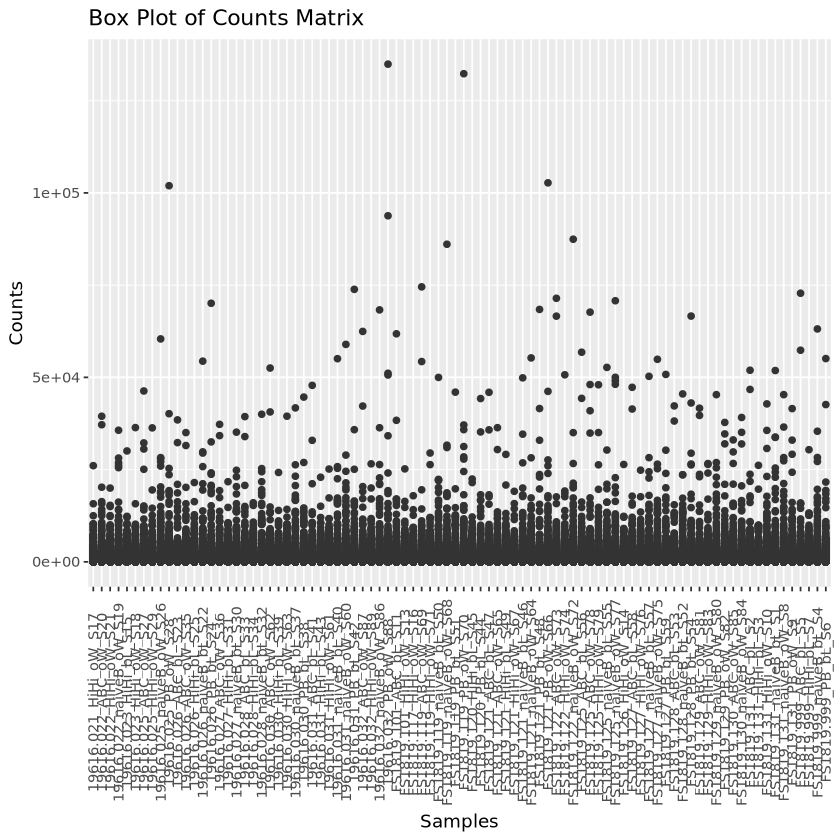

In [39]:
box_plot

In [17]:
# Metadata
metadata <- read.delim("metadata.txt")
head(metadata)

,id,Sample_title,Sample_geo_accession,Time_Point,condition,Cell_Type
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,19616-021_HiHi_oW_S17,anti-PD1-treated adult 1_HiHi_oW,GSM5419198,1 Week,anti-PD1,ICOS+CD38+ cTfh
2,19616-022_ABC_oW_S20,anti-PD1-treated adult 2_ABC_oW,GSM5419199,1 Week,anti-PD1,Activated B cells
3,19616-022_HiHi_oW_S21,anti-PD1-treated adult 2_HiHi_oW,GSM5419200,1 Week,anti-PD1,ICOS+CD38+ cTfh
4,19616-022_naiveB_oW_S19,anti-PD1-treated adult 2_naiveB_oW,GSM5419201,1 Week,anti-PD1,Naïve B cells
5,19616-023_HiHi_bL_S15,anti-PD1-treated adult 3_HiHi_bL,GSM5419202,0 Week (Baseline),anti-PD1,ICOS+CD38+ cTfh
6,19616-023_HiHi_oW_S18,anti-PD1-treated adult 3_HiHi_oW,GSM5419203,1 Week,anti-PD1,ICOS+CD38+ cTfh


In [18]:
# DEG
dds <- suppressWarnings(DESeqDataSetFromMatrix(countData = counts_mat,
                              colData = metadata,
                              design = ~ condition))

dds <- suppressWarnings(DESeq(dds))
dds <- estimateSizeFactors(dds)
analysis <- counts(dds, normalized=FALSE)

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning 

In [19]:
head(analysis)

,19616.021_HiHi_oW_S17,19616.022_ABC_oW_S20,19616.022_HiHi_oW_S21,19616.022_naiveB_oW_S19,19616.023_HiHi_bL_S15,19616.023_HiHi_oW_S18,19616.025_ABC_oW_S27,19616.025_HiHi_oW_S29,19616.025_naiveB_oW_S26,19616.025_PB_oW_S28,⋯,FS1819.131_ABC_bL_S2,FS1819.131_HiHi_bL_S3,FS1819.131_HiHi_oW_S10,FS1819.131_naiveB_bL_S1,FS1819.131_naiveB_oW_S8,FS1819.131_PB_oW_S9,FS1819.999_ABC_bL_S5,FS1819.999_HiHi_bL_S7,FS1819.999_naiveB_bL_S4,FS1819.999_PB_bL_S6
TSPAN6,0,0,0,0,0,1,0,2,0,3,⋯,2,4,17,1,3,1,0,1,0,0
DPM1,191,113,181,87,221,163,117,142,86,114,⋯,161,168,99,100,91,85,92,179,94,137
SCYL3,8,21,21,8,52,24,38,18,19,19,⋯,60,16,10,14,16,26,53,19,13,14
C1orf112,5,1,3,4,16,7,8,5,0,5,⋯,1,4,0,2,4,0,4,2,0,13
FGR,125,299,51,457,57,0,794,476,78,637,⋯,330,108,722,433,492,695,233,303,338,495
CFH,0,0,2,0,0,3,0,1,0,0,⋯,0,0,0,1,0,6,0,1,0,0


In [23]:
phen <- tibble::rownames_to_column(as.data.frame(colData(dds)), "Sample") %>%
    rename(Condition = condition) %>%
    mutate(Source = 'PBMC') %>%
    select(Sample, Condition, Time_Point, Cell_Type) %>%
    mutate(across(everything(), as.character))
phen$Compare_All <- paste(phen$Condition, phen$Time_Point, phen$Cell_Type, sep = "_")
head(phen)

,Sample,Condition,Time_Point,Cell_Type,Compare_All
,<chr>,<chr>,<chr>,<chr>,<chr>
1,19616.021_HiHi_oW_S17,anti-PD1,1 Week,ICOS+CD38+ cTfh,anti-PD1_1 Week_ICOS+CD38+ cTfh
2,19616.022_ABC_oW_S20,anti-PD1,1 Week,Activated B cells,anti-PD1_1 Week_Activated B cells
3,19616.022_HiHi_oW_S21,anti-PD1,1 Week,ICOS+CD38+ cTfh,anti-PD1_1 Week_ICOS+CD38+ cTfh
4,19616.022_naiveB_oW_S19,anti-PD1,1 Week,Naïve B cells,anti-PD1_1 Week_Naïve B cells
5,19616.023_HiHi_bL_S15,anti-PD1,0 Week (Baseline),ICOS+CD38+ cTfh,anti-PD1_0 Week (Baseline)_ICOS+CD38+ cTfh
6,19616.023_HiHi_oW_S18,anti-PD1,1 Week,ICOS+CD38+ cTfh,anti-PD1_1 Week_ICOS+CD38+ cTfh


In [24]:
saveRDS(analysis, file = file.path("PBMC_RNAseq_GSE179487", "expression.rds"))
saveRDS(phen, file = file.path("PBMC_RNAseq_GSE179487", "metadata.rds"))

In [25]:
system("R -e \"shiny::runApp('PBMC_RNAseq_GSE179487')\"")